# Assigment 4: Data Analysis and Visualization

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

The data you will work with was taken from [Alaskan vegetation plots](https://daac.ornl.gov/ABOVE/guides/Arrigetch_Peaks_Veg_Plots.html) from 1978-1981. The data set is in the `data/` subdirectory in this repo in two .csv files containing information about research plots and the plant species covering the plots. **Please read the descriptions for the data, as they will help you answer the questions.** 

**Table 1: Data files**
| Data File Name |	Description |
| --- | --- |
| Arrigetch_Peaks_Environmental_Data.csv| Environmental characterization data for Arrigetch Peaks research plots |
| Arrigetch_Peaks_Species_Data.csv | Species cover data for Arrigetch Peaks research plots|

**Table 2. Arrigetch_Peaks_Environmental_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| PLANT_COMMUNITY_NAME	|  |	Primary vegetation types |
| ELEVATION |	m	| Elevation of the plots |
| ASPECT	| deg	| Aspect of the plots |
| SLOPE	| deg	| Slope of the plots |
| COVER_LITTER_LAYER	| % |	Percentage of litter layer cover in the plot |
|COVER_OPEN_WATER	| % | 	Percentage of open water cover in the plot |
| COVER_ROCK	| % |	Percentage of rock cover in the plot |
| COVER_CRUST	| % |	Percentage of crust cover in the plot |
| COVER_BARE_SOIL	| % |	Percentage of bare soil cover in the plot|
| REMARKS	 |  |	Field notes |

**Table 3. Arrigetch_Peaks_Species_Data.csv**
| Column Name	| Units	| Description |
| --- | --- | --- |
| TURBOVEG_PLOT_NUMBER	 |	 | TURBOVEG plot number |
| species name | | data values are Species Cover Classes: where r (rare), + (common, but less than 1% cover), 1 (1-5 percent), 2 (6 to 25%), 3 (25 to 50%), 4 (51 to 75%), 5 (76 to 100%). |

## Question 1: Pandas (15 pt)

Load the two data sets into Python with Pandas. Name the environmental data frame `env`, and the species data frame `species`. Display the first few rows of each data frame. What are the dimensions of the two data frames? (2 pt)

Replace all values in both data frames that are `-9999` with `np.NaN`. (1 pt)

Print how many unique plant community names there are. (1 pt)

Print summary statistics for all numerical columns in `env`, excluding `"TURBOVEG_PLOT_NUMBER"`. (2 pt)

Merge the two data frames together by the column `TURBO_PLOT_NUMBER`. (1 pt)

How many rows in the merged data frame contain missing data? (1 pt)

Which species was present in the most plots? (3 pt)

For all rows in `species`, calculate the sum of all the columns (excluding `"TURBOVEG_PLOT_NUMBER"`) for each row. Add this sum as a new column called `"totals"`. (2 pt)

Read the description included above for the `species` data frame. Are there any inconsistencies between the description and the data? Explain. If there are inconsistences, what would you do to correct them? (2 pt)

In [1]:
import pandas as pd 
import numpy as np 

env_file = "data/Arrigetch_Peaks_Environmental_Data.csv"
species_file = "data/Arrigetch_Peaks_Species_Data.csv"

env = pd.read_csv(env_file)
species = pd.read_csv(species_file)

In [2]:
env.head()

,TURBOVEG_PLOT_NUMBER,PLANT_COMMUNITY_NAME,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL,REMARKS
0,10925,Ass. Umbilicarietum pensylvanicae-carolinianae,1090,45,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
1,10926,Ass. Umbilicarietum pensylvanicae-carolinianae,920,315,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
2,10927,Ass. Umbilicarietum pensylvanicae-carolinianae,940,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...
3,10928,Ass. Umbilicarietum pensylvanicae-carolinianae,950,225,-9999,0,0,0,0,0,Umbilicaria arctica = in original Umbilicaria ...
4,10929,Ass. Umbilicarietum pensylvanicae-carolinianae,935,270,-9999,0,0,0,0,0,Crustose and foliose lichen dominated vegetati...


In [3]:
print('env dimensions', env.shape)
print('species dimensions', species.shape)


env dimensions (439, 11)
species dimensions (439, 409)


In [4]:
species = species.replace(-9999, np.NaN)
env = env.replace(-9999, np.NaN)

In [5]:
print(len(pd.unique(env.PLANT_COMMUNITY_NAME)))

51


In [6]:
env.dtypes

TURBOVEG_PLOT_NUMBER      int64
PLANT_COMMUNITY_NAME     object
ELEVATION               float64
ASPECT                  float64
SLOPE                   float64
COVER_LITTER_LAYER        int64
COVER_OPEN_WATER          int64
COVER_ROCK                int64
COVER_CRUST               int64
COVER_BARE_SOIL           int64
REMARKS                  object
dtype: object

In [7]:
num_cols = ['ELEVATION', 'ASPECT', 'SLOPE', 'COVER_LITTER_LAYER', 'COVER_OPEN_WATER', 'COVER_ROCK', 'COVER_CRUST', 'COVER_BARE_SOIL']
env[num_cols].describe()

,ELEVATION,ASPECT,SLOPE,COVER_LITTER_LAYER,COVER_OPEN_WATER,COVER_ROCK,COVER_CRUST,COVER_BARE_SOIL
count,374.000000,244.000000,147.0,439.000000,439.0,439.000000,439.000000,439.000000
mean,1111.802139,184.241803,0.0,36.913440,0.0,13.936219,4.341686,14.321185
std,227.223605,103.151667,0.0,30.059329,0.0,18.166670,12.113122,17.990339
min,730.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,940.000000,135.000000,0.0,8.000000,0.0,1.000000,0.000000,1.000000
50%,1050.000000,180.000000,0.0,30.000000,0.0,8.000000,0.000000,8.000000
75%,1270.000000,270.000000,0.0,65.000000,0.0,20.000000,0.000000,20.000000
max,1920.000000,360.000000,0.0,100.000000,0.0,95.000000,80.000000,85.000000


In [8]:
species_and_env = pd.merge(env, species, left_on= 'TURBOVEG_PLOT_NUMBER', right_on='TURBOVEG_PLOT_NUMBER')
sum(species_and_env.isnull().any(axis=1))

422

In [9]:
species_count = {}

for col in species.columns:
    if col != 'TURBOVEG_PLOT_NUMBER':
        species_count[col] = species[col][species[col]>0].shape[0]

max_species = ''
m = 0 

for species_name, count in species_count.items():
    if count > m:
        m = count 
        max_species = species_name 
print(max_species)

Cetraria islandica


In [10]:

species['Total'] = species.sum(axis=1)

species.head()

,TURBOVEG_PLOT_NUMBER,Abietinella abietina,Acarospora schleicheri,Aconitum delphinifolium delphinifolium,Alectoria ochroleuca,Parmelia almquistii,Dactylina madreporiformis,Alnus crispa crispa,Amphidium mougeotii,Andreaea blyttii,...,Vaccinium uliginosum microphyllum,Vaccinium uliginosum alpinum,Vaccinium vitis-idaea minus,Valeriana capitata,Cetraria tilesii,Wilhelmsia physodes,Woodsia alpina,Woodsia glabella,Xanthoria elegans,Total
0,10925,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,11004.5
1,10926,0.0,0.0,0.0,6.0,0.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,11027.0
2,10927,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,11062.5
3,10928,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,11012.0
4,10929,0.0,0.0,0.0,2.0,1.0,0.0,0,0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,11013.5


## Question 2: Plotting (15 pt)

Make a figure showing the relationship between elevation and cover rock percentage. Is there a positive relationship, negative relationship, or no relationship between the two variables? (3 pt)

Make a figure showing the distribution of the `"totals"` column you created in the `species` data frame. Print summary statistics for this column, as well. (3 pt)

Create a subset of `env` containing rows with the plant community names `"Caricetum scirpoideae-rupestris"`,`"Pedicularo kanei-Caricetum glacialis"`, and `"Saxifrago tricuspidatae-Artemisietum alaskanae"`. (2 pt)

Create a figure to compare the mean cover bare soil percentage of the plant communities. Describe what the figure tells us-> are there differences among the plant communities in cover bare soil percentage? Which has the highest median value? The lowest? Are there differences in the spread among the communities? (4 pt)

For all figures, label your axes descriptively with units. If necessary, create legends. Make your figures large enough to be easily readable, and **make sure that no text is overlapping**. Save all figures, and make sure to commit them (3 pt).




<function matplotlib.pyplot.show(close=None, block=None)>

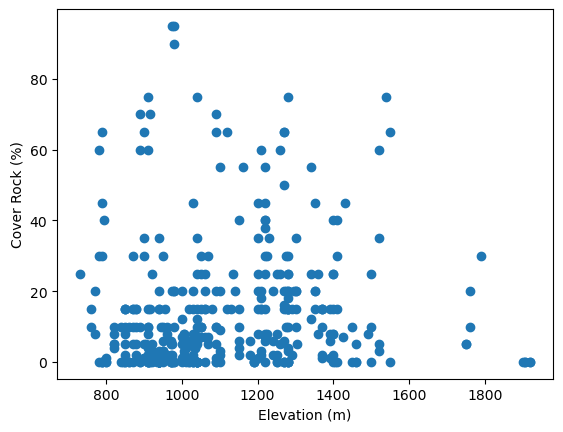

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(env['ELEVATION'], env['COVER_ROCK'])
ax.set_xlabel('Elevation (m)')
ax.set_ylabel('Cover Rock (%)')
plt.show


No clear relationship between elevation and cover rock 

Text(0, 0.5, 'Frequency')

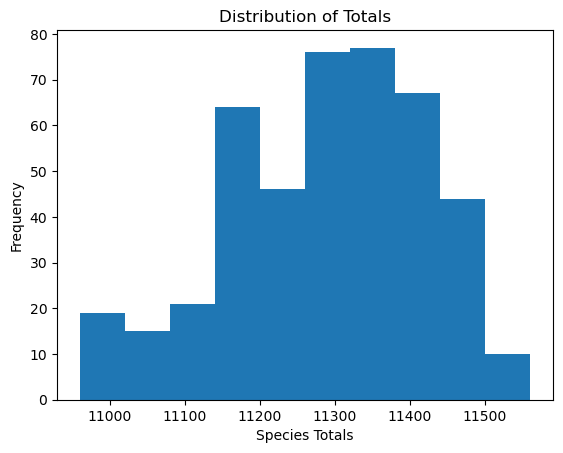

In [13]:
plt.hist(species['Total'])
plt.title('Distribution of Totals')
plt.xlabel("Species Totals")
plt.ylabel("Frequency")
species["Total"].describe()

In [16]:
import seaborn as sns
cols = ["Caricetum scirpoideae-rupestris","Pedicularo kanei-Caricetum glacialis", "Saxifrago tricuspidatae-Artemisietum alaskanae"]
boxplot_df = env.loc[(env ['PLANT_COMMUNITY_NAME'] == cols[0])|(env ['PLANT_COMMUNITY_NAME'] == cols[1])|(env ['PLANT_COMMUNITY_NAME'] == cols[2]), :]



<function matplotlib.pyplot.show(close=None, block=None)>